<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks-for-Ideas/blob/main/Time_Dependent_Perturbation_Theory_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install qutip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 17.7 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


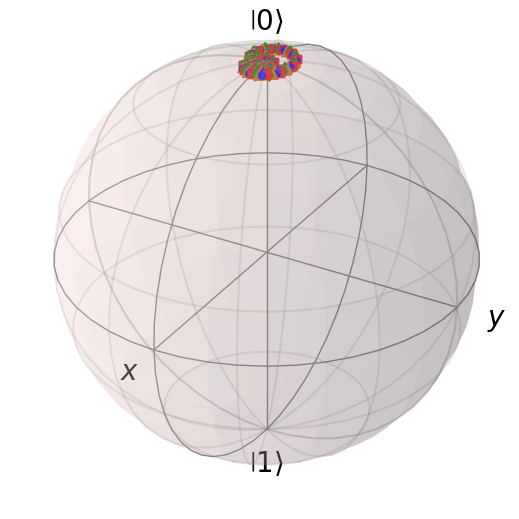

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Define parameters
omega = 2 * np.pi  # Unperturbed energy splitting
epsilon = 0.2      # Perturbation strength
Omega = 3.0        # Perturbation frequency
T = 5              # Total evolution time
steps = 200        # Time steps
times = np.linspace(0, T, steps)

# Define Pauli matrices
sx = sigmax()
sy = sigmay()
sz = sigmaz()

# Define the time-dependent perturbation V(t)
def V_t(t, args):
    return epsilon * np.cos(Omega * t)

# Unperturbed Hamiltonian
H0 = (omega / 2) * sz

# Perturbation term
H1 = sx  # σ_x term
H = [H0, [H1, V_t]]  # Total Hamiltonian including time-dependent perturbation

# Initial state (ground state)
psi0 = basis(2, 0)

# Solve the Schrödinger equation
result = sesolve(H, psi0, times, [sx, sy, sz])

# Extract expectation values
ex = result.expect[0]
ey = result.expect[1]
ez = result.expect[2]

# Bloch sphere visualization
bloch = Bloch()
for i in range(len(times)):
    bloch.add_points([ex[i], ey[i], ez[i]])

bloch.show()
